# Hierarchical Cluster Analysis

In [1]:
# Carregar pacotes
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering 

%matplotlib inline

# Ignore warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importar dados
df = pd.read_csv('../data/data_sus.csv', sep=",")

In [3]:
# Scale the data and normalize
sc = StandardScaler()
df_scaled = sc.fit_transform(df)
df_normalized = normalize(df_scaled)

In [4]:
# Reduce the dimensionality of data to 3 features
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2', 'P3']

In [5]:
print(df_pca.shape)
df_pca.head()

(4122305, 3)


,P1,P2,P3
0,-0.333172,0.111326,-0.182107
1,-0.316396,0.118968,-0.241504
2,-0.291020,0.091720,-0.285806
3,-0.294213,-0.020293,-0.101620
4,-0.263615,0.105973,-0.204871


In [6]:
df_teste = df_pca.sample(frac=0.0001) 
print(df_teste.shape)
df_teste.head()

(412, 3)


,P1,P2,P3
54557,0.037846,-0.089089,-0.048660
3274309,0.017514,-0.003791,0.158863
1826315,0.261013,-0.165868,-0.216326
2276868,0.235581,-0.055163,0.110187
1805975,0.383954,-0.073034,-0.257968


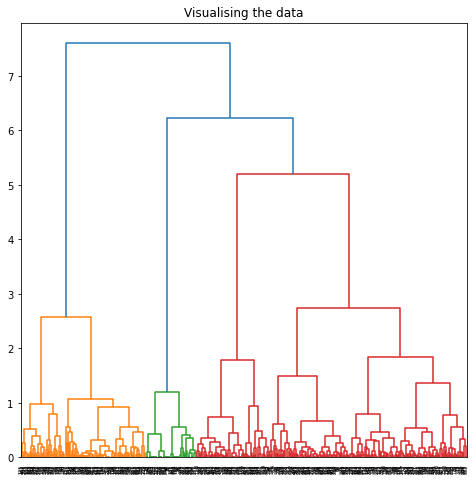

In [7]:
# Create the Dendogram plot
#
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(df_teste, method ='ward')))

In [8]:
df_teste = df_pca.sample(frac=0.001) 
print(df_teste.shape)
df_teste.head()

(4122, 3)


,P1,P2,P3
2269268,0.361974,0.256941,-0.214401
1803433,0.001040,-0.349618,-0.190844
1563223,-0.517941,0.290048,-0.175885
3588102,0.357634,-0.003978,0.513091
1306701,-0.508712,0.123438,-0.068338


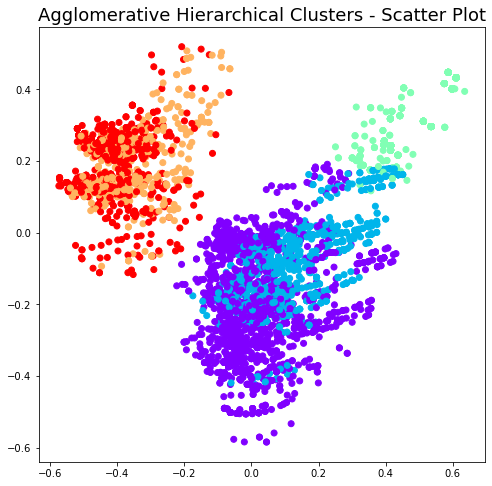

In [9]:
# Create the clusters using Agglomerative hierarchical clustering
agc = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(8, 8))
plt.scatter(df_teste['P1'], df_teste['P2'], c = agc.fit_predict(df_teste), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show() 